In [20]:
import pandas as pd
import numpy as np
from tabprintin.beautify import *
import matplotlib.pyplot as plt
from varname import nameof
import os
import subprocess

In [21]:
resource = "../../data/generated/"
results = "../../latex/"

In [22]:
# Check if the directory exists or not
if not os.path.exists(results + "tables"):
    # If it doesn't exist, create it
    os.makedirs(results + "tables")

tables = "tables/"

# Check if the directory exists or not
if not os.path.exists(results + "plots"):
    # If it doesn't exist, create it
    os.makedirs(results + "plots")

plots = "plots/"

In [23]:
# %run do_analysis.ipynb

In [24]:
# Exogenous variables to be showned
# exogvars = (['ex_mkt',
#              'ex_long_gov_ret',
#              'ex_medium_gov_ret',
#              'ex_high_yd_bd_ret',
#              'ex_gold_ret', 
#              'slope_ex_mkt_87', 
#              'slope_ex_mkt_9602', 
#              'Intercept',
#              'rf', 
#              'lag_10y_3m_gov_bd_yd',
#              'lag_1y_3m_gov_bd_yd',
#              'lag_Baa_Aaa_bd_yd',
#              'lag_sp_div_yd',
#              'log_indprod_growth_lastyear',
#              'infl_lastyear',
#              'ex_mkt_lastyear'])
exogvars = (['ex_mkt',
             'ex_b10ret',
             'ex_b5ret',
        #      'ex_high_yd_bd_ret',
             'ex_gold_ret', 
             'slope_ex_mkt_87', 
             'slope_ex_mkt_9602', 
             'Intercept',
             'rf', 
             'lag_10y_3m_gov_bd_yd',
             'lag_1y_3m_gov_bd_yd',
             'lag_Baa_Aaa_bd_yd',
             'lag_sp_div_yd',
             'log_indprod_growth_lastyear',
             'infl_lastyear',
             'ex_mkt_lastyear'])

# varlabels={  'log_indprod_growth_nextyear': r'Ind. productivity growth',
#              'ex_mkt': r'Market portfolio ex. return ($RM_{t-1,t}$)',
#              'ex_b10ret': r'Long-term gov. bond ex. return$_{t-1,t}$',
#              'ex_b5ret': r'Medium-term gov. bond ex. return$_{t-1,t}$',
#              'ex_high_yd_bd_ret': r'High-yield bond portfolio ex. return$_{t-1,t}$', 
#              'ex_gold_ret': r'Gold ex. returns$_{t-1,t}$', 
#              'slope_ex_mkt_87': 'Slope dummy mkt portfolio ex. return (87)', 
#              'slope_ex_mkt_9602': 'Slope dummy mkt portfolio ex. return (96-02)',
#              'rf': 'Risk-free rate of return', 
#              'lag_10y_3m_gov_bd_yd': r'10-year minus 3-month gov. bond yield$_{t-1}$',
#              'lag_1y_3m_gov_bd_yd': r'1-year minus 3-month gov. bond yield$_{t-1}$',
#              'lag_Baa_Aaa_bd_yd': r'Baa minus Aaa corporate bond yield$_{t-1}$',
#              'lag_sp_div_yd': r'Dividend yield$_{t-1}$',
#              'log_indprod_growth_lastyear': r'Industrial production growth$_{t-13,t-1}$',
#              'infl_lastyear': r'Inflation$_{t-13,t-1}$',
#              'ex_mkt_lastyear': r'Market portfolio ex. return ($RM_{t-13,t-1}$)'}
varlabels={  'log_indprod_growth_nextyear': r'Ind. productivity growth',
             'ex_mkt': r'Market portfolio ex. return ($RM_{t-1,t}$)',
             'ex_b10ret': r'10-year gov. bond ex. return$_{t-1,t}$',
             'ex_b5ret': r'5-year gov. bond ex. return$_{t-1,t}$',
        #      'ex_high_yd_bd_ret': r'High-yield bond portfolio ex. return$_{t-1,t}$', 
             'ex_gold_ret': r'Gold ex. returns$_{t-1,t}$', 
             'slope_ex_mkt_87': 'Slope dummy mkt portfolio ex. return (87)', 
             'slope_ex_mkt_9602': 'Slope dummy mkt portfolio ex. return (96-02)',
             'rf': 'Risk-free rate of return', 
             'lag_10y_3m_gov_bd_yd': r'10-year minus 3-month gov. bond yield$_{t-1}$',
             'lag_1y_3m_gov_bd_yd': r'1-year minus 3-month gov. bond yield$_{t-1}$',
             'lag_Baa_Aaa_bd_yd': r'Baa minus Aaa corporate bond yield$_{t-1}$',
             'lag_sp_div_yd': r'Dividend yield$_{t-1}$',
             'log_indprod_growth_lastyear': r'Industrial production growth$_{t-13,t-1}$',
             'infl_lastyear': r'Inflation$_{t-13,t-1}$',
             'ex_mkt_lastyear': r'Market portfolio ex. return ($RM_{t-13,t-1}$)'}

# row_name = (['Intercept',
#              r'Market portfolio excess return ($RM_{t-1,t}$)',
#              r'Long-term government bond excess return$_{t-1,t}$',
#              r'Medium-term government bond excess return$_{t-1,t}$',
#              r'High-yield bond portfolio excess return$_{t-1,t}$', 
#              r'Gold ex. returns$_{t-1,t}$', 
#              'Slope dummy mkt portfolio ex. return (1987)', 
#              'Slope dummy mkt portfolio ex. return (1996-2002)',
#              'Risk-free rate of return', 
#              r'10-year minus 3-month government bond yield$_{t-1}$',
#              r'1-year minus 3-month government bond yield$_{t-1}$',
#              r'Baa minus Aaa corporate bond yield$_{t-1}$',
#              r'Dividend yield$_{t-1}$',
#              r'Industrial production growth$_{t-13,t-1}$',
#              r'Inflation$_{t-13,t-1}$',
#              r'Market portfolio excess return ($RM_{t-13,t-1}$)'])
row_name = (['Intercept',
             r'Market portfolio excess return ($RM_{t-1,t}$)',
             r'10-year government bond excess return$_{t-1,t}$',
             r'5-year government bond excess return$_{t-1,t}$',
        #      r'High-yield bond portfolio excess return$_{t-1,t}$', 
             r'Gold ex. returns$_{t-1,t}$', 
             'Slope dummy mkt portfolio ex. return (1987)', 
             'Slope dummy mkt portfolio ex. return (1996-2002)',
             'Risk-free rate of return', 
             r'10-year minus 3-month government bond yield$_{t-1}$',
             r'1-year minus 3-month government bond yield$_{t-1}$',
             r'Baa minus Aaa corporate bond yield$_{t-1}$',
             r'Dividend yield$_{t-1}$',
             r'Industrial production growth$_{t-13,t-1}$',
             r'Inflation$_{t-13,t-1}$',
             r'Market portfolio excess return ($RM_{t-13,t-1}$)'])

col_name = (['HML',
             'SMB',
             'WML',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

%store -r mimick1
%store -r mimick2

mimick = pystout(models=[mimick1,mimick2],
        # file='test_table.tex',
        # addnotes=['Here is a little note','And another one'],
        exogvars=exogvars,
        endog_names=True,
        varlabels=varlabels,
        digits=3,
        addrows={'1-month lagged base asset returns':['No','Yes']},
        modstat={'nobs':'Obs','rsquared_adj':'Adj. R\sym{2}','fvalue':'F-stat'}
        )
        
# Open a .tex file for writing  
with open(results + tables + nameof(mimick) + '.tex', 'w') as f:
# with open(results + nameof(mimick) + '.tex', 'w') as f:
    # Write the LaTeX string to the file
    f.write(mimick)

In [25]:
var_name = (['MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

stat_name = (['N', 
             r'Mean ($\times 10^3$)', 
             r'Std. dev. ($\times 10^3$)', 
             r'Min. ($\times 10^3$)', 
             r'25\% ($\times 10^3$)', 
             r'Median ($\times 10^3$)',
             r'75\% ($\times 10^3$)',
             r'Max. ($\times 10^3$)'])

%store -r summary

summary.index = var_name
summary.columns = stat_name

summary.N = summary.N.astype(int)


# Create a copy of the original DataFrame
summary_copy = summary.copy()
summary_copy.iloc[:,1:] = summary_copy.iloc[:,1:] * 1000

summary_stats = summary_copy.style.format(decimal='.', thousands=',', precision=3).to_latex()

summary_stats = summary_stats.replace('\\begin{tabular}{lrrrrrrrr}','\\begin{tabular}{lrrrrrrrr} \n \\hline \n \\hline')
summary_stats = summary_stats.replace('MYP','\\hline \n MYP')
summary_stats = summary_stats.replace('\\end{tabular}','\n \\hline \\hline \n \\end{tabular}')

# Open a .tex file for writing  
with open(results + tables + nameof(summary_stats) + '.tex', 'w') as f:
    # Write the LaTeX string to the file
    f.write(summary_stats)

In [26]:
# %store -r var

# coef_data = var.params
# tstat_data = var.tvalues

# row_name = (['Constant',
#              'HML',
#              'SMB',
#              'WML',
#              'MYP', 
#              'UI', 
#              'DSV', 
#              'ATS',
#              'STS', 
#              'FX'])

# col_name = (['HML',
#              'SMB',
#              'WML',
#              'MYP', 
#              'UI', 
#              'DSV', 
#              'ATS',
#              'STS', 
#              'FX'])

# var_est = table_to_latex(coef_data, tstat_data,  row_name, col_name)

# # Open a .tex file for writing  
# with open(results + tables + nameof(var_est) + '.tex', 'w') as f:
#     # Write the LaTeX string to the file
#     f.write(var_est)

In [27]:
%store -r coeff_var
%store -r tvalues_var
%store -r pvalues_var

coeff_var = pd.DataFrame(coeff_var)
tvalues_var = pd.DataFrame(tvalues_var)
pvalues_var = pd.DataFrame(pvalues_var)

row_name = (['Constant',
             'HML',
             'SMB',
             'WML',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

col_name = (['HML',
             'SMB',
             'WML',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

var_est = table_to_latex(coeff_var, tvalues_var, pvalues_var, row_name, col_name)

# Open a .tex file for writing  
with open(results + tables + 'var.tex', 'w') as f:
    # Write the LaTeX string to the file
    f.write(var_est)

In [28]:
# %store -r premia_port
# %store -r premia_t_stat_port

# # Plot market price of risk
# row_name = ([r'Market price of risk ($\lambda$) (\times 100)'])

# col_name = (['MYP',
#              'UI', 
#              'DSV', 
#              'ATS',
#              'STS', 
#              'FX'])

# tex = []
# for index, i in enumerate([0,1,2]): 
#     premia_table = table_to_latex(pd.DataFrame(premia_port[i] * 100), pd.DataFrame(premia_t_stat_port[i]), col_name, row_name)
#     tex.append(premia_table)

# # Create files for tables and graphs
# for index, t in enumerate(tex):
#     # Open a .tex file for writing
#     with open(results + tables + f'riskpremia{index+1}.tex', 'w') as f:
#         # Write the LaTeX string to the file
#         f.write(t)

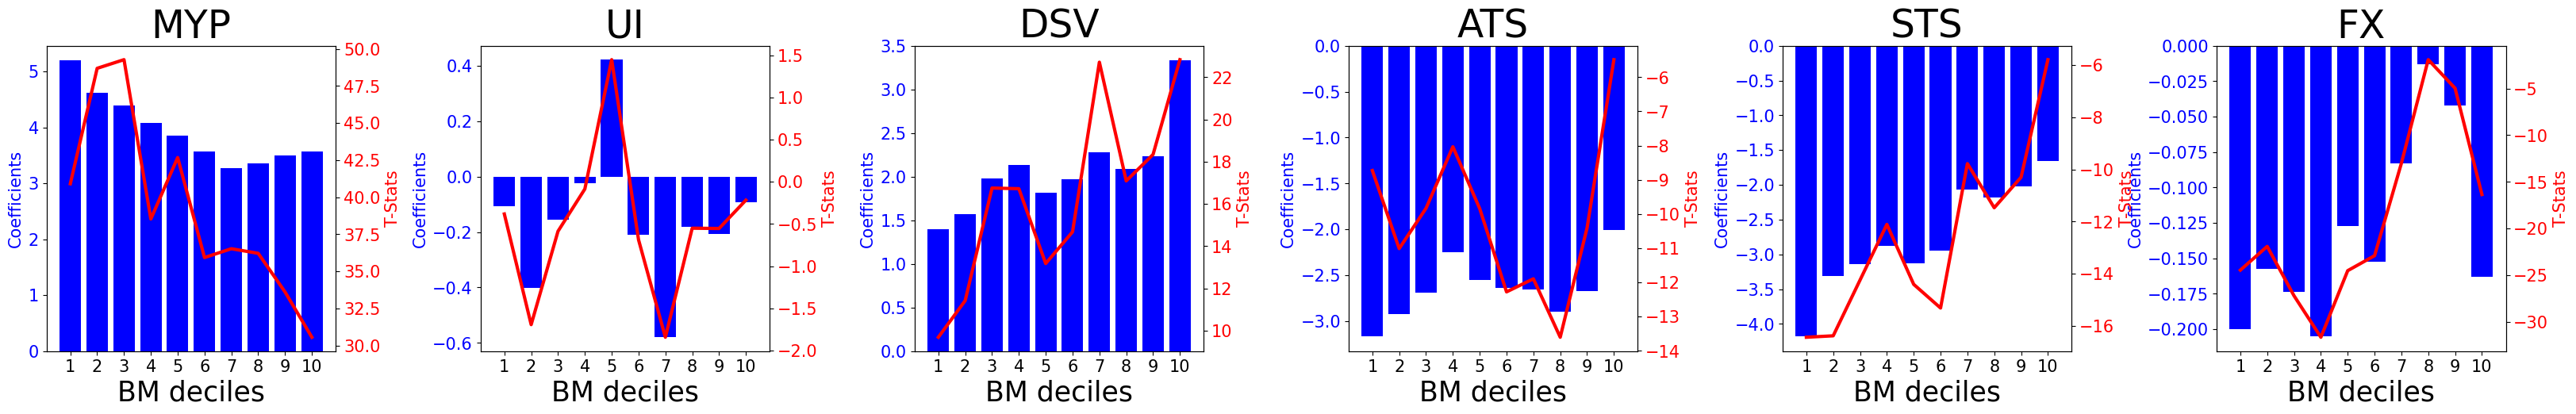

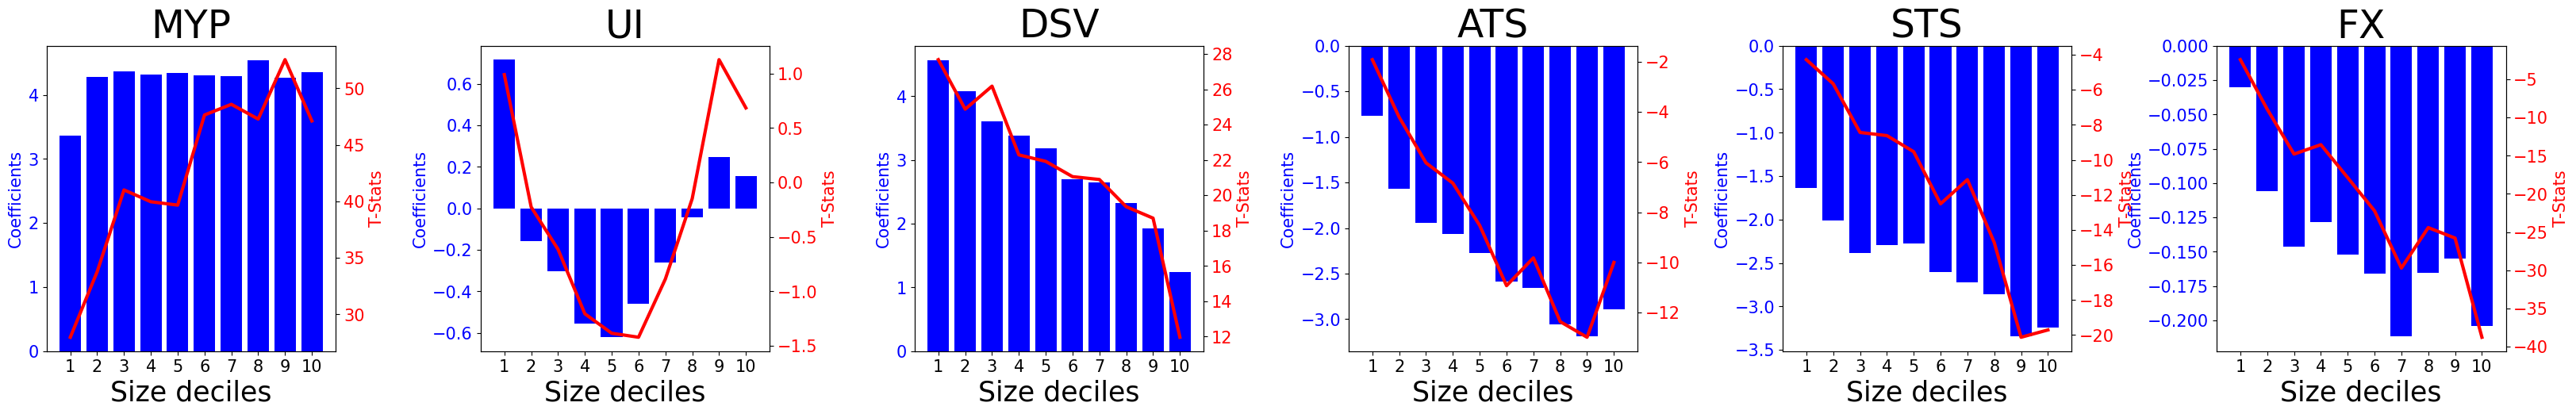

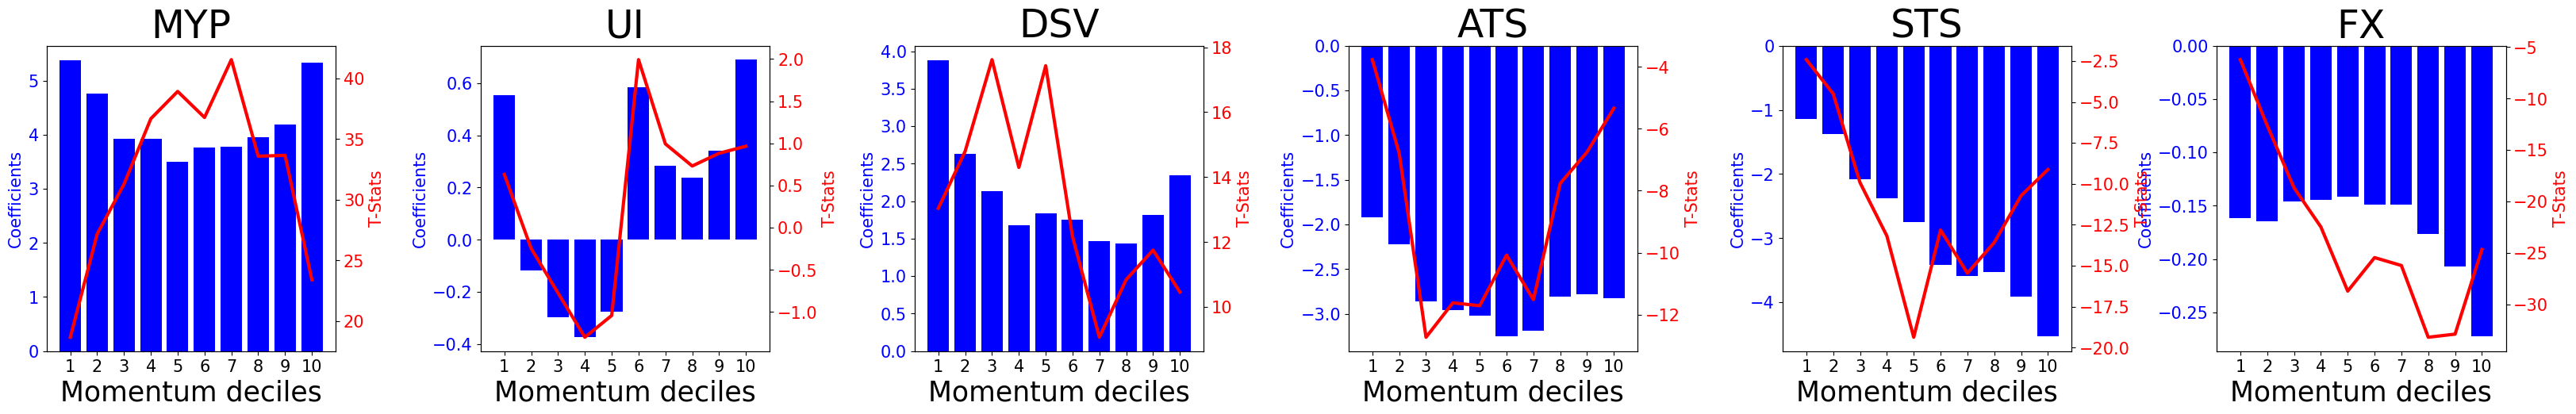

In [29]:
%store -r beta_port
%store -r beta_t_stat_port

macro_factors = ['MYP', 'UI', 'DSV', 'ATS', 'STS', 'FX']
portfolios = ['BM deciles', 'Size deciles', 'Momentum deciles']

for index, j in enumerate([0,1,2]):
    # Create a figure with subplots for each column
    fig, axs = plt.subplots(1, 6, figsize=(40, 5))
    # Generate random data for example
    coefficients = beta_port[j]
    # coefficients = np.arange(1, beta.shape[0]+1)
    t_stats = beta_t_stat_port[j]
    # t_stats = np.arange(1, beta_t_stat.shape[0]+1)

    # Loop through each column and plot the histogram and line plot
    for index2, i in enumerate(range(coefficients.shape[1])):
        # Plot histogram of coefficients on left y-axis
        axs[i].bar(np.arange(1, coefficients.shape[0]+1), coefficients[:, i], color='blue')
        axs[i].set_ylabel('Coefficients', color='blue', fontsize=15)
        axs[i].tick_params(axis='y', labelcolor='blue', labelsize=15)
        
        # Add line plot of t-stats on right y-axis
        axs2 = axs[i].twinx()
        axs2.plot(np.arange(1, t_stats.shape[0]+1), t_stats[:, i], color='red', linewidth=3)
        axs2.set_ylabel('T-Stats', color='red', fontsize=15)
        axs2.tick_params(axis='y', labelcolor='red', labelsize=15)
        
        # Set x-axis label and tick marks
        axs[i].set_xlabel(portfolios[index], fontsize=25)
        axs[i].set_xticks(np.arange(1, coefficients.shape[0]+1))
        axs[i].tick_params(axis='x', labelsize=15)
        axs[i].set_title(macro_factors[index2], fontsize=35)

    # Increase space between subplots
    fig.subplots_adjust(wspace=0.5)

    # Save the figure to the specified location
    fig.savefig(results + plots + f'betahist{index+1}.png', bbox_inches='tight')
